# Guia 2

## Problema 1

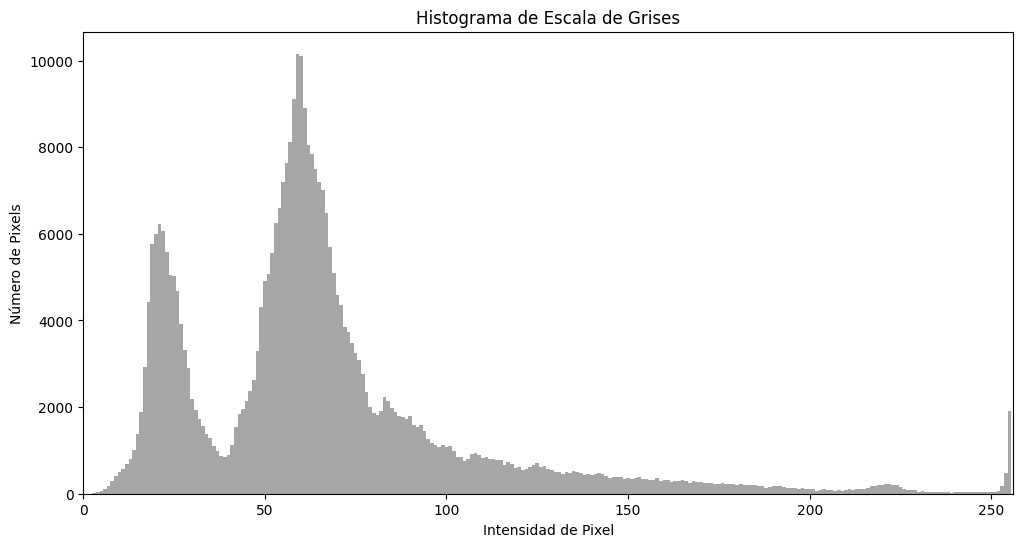

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
img = Image.open('Imagenes/sunset.jpg').convert('L')

# Convertir la imagen a un array de NumPy
img_array = np.array(img)

# Calcular el histograma
hist, bins = np.histogram(img_array.flatten(), bins=256, range=[0, 256])

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.title('Histograma de Escala de Grises')
plt.xlabel('Intensidad de Pixel')
plt.ylabel('Número de Pixels')

# Graficar el histograma como barras
plt.bar(bins[:-1], hist, width=1, color='gray', alpha=0.7)

plt.xlim([0, 256])

# Mostrar el gráfico
plt.show()

De la imagen se puede apreciar que tiene dos areas principales y mas cerca del negro, por lo que probablemente sea una imagen con fondo oscuro. Ocupa un gran espectro, por lo que probablemente tenga bastantes detalles y una buena exposicion.

## Problema 2

La función **histeq** realiza la ecualización del histograma de una imagen. Primero, calcula el histograma de la imagen, que representa la distribución de intensidades de píxeles. Luego, computa el histograma acumulado de este histograma y lo normaliza al rango de 0 a 255. Utilizando este histograma acumulado normalizado como una función de mapeo, transforma los valores de píxeles originales a nuevos valores mediante interpolación. Este proceso redistribuye las intensidades de los píxeles, expandiendo el rango dinámico de la imagen y, generalmente, mejorando el contraste global. La función devuelve la imagen ecualizada y el histograma acumulado utilizado.

Mejora notablemente las imagenes, en particular en la imagen de la placa se pueden apreciar hasta nuevos detalles que en la imagen original no se lograba ver.

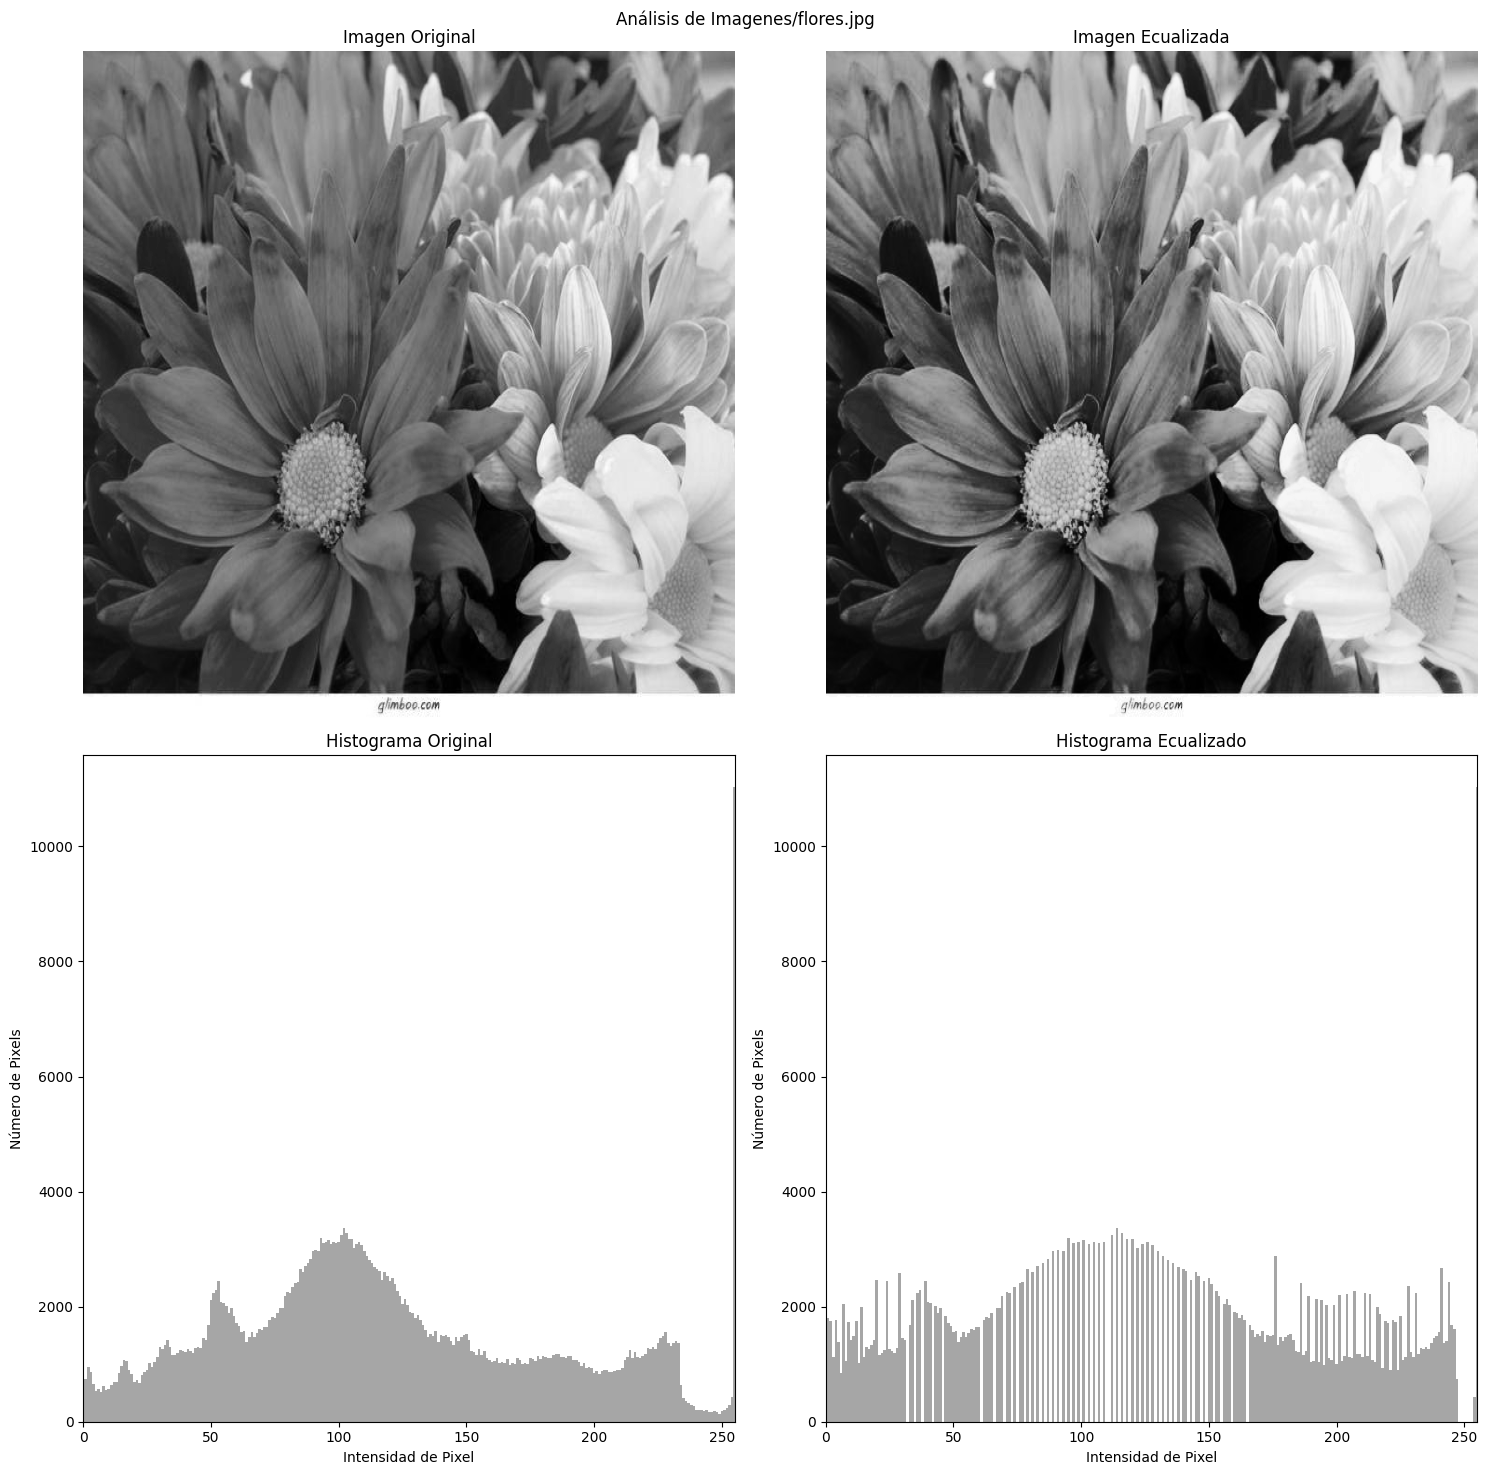

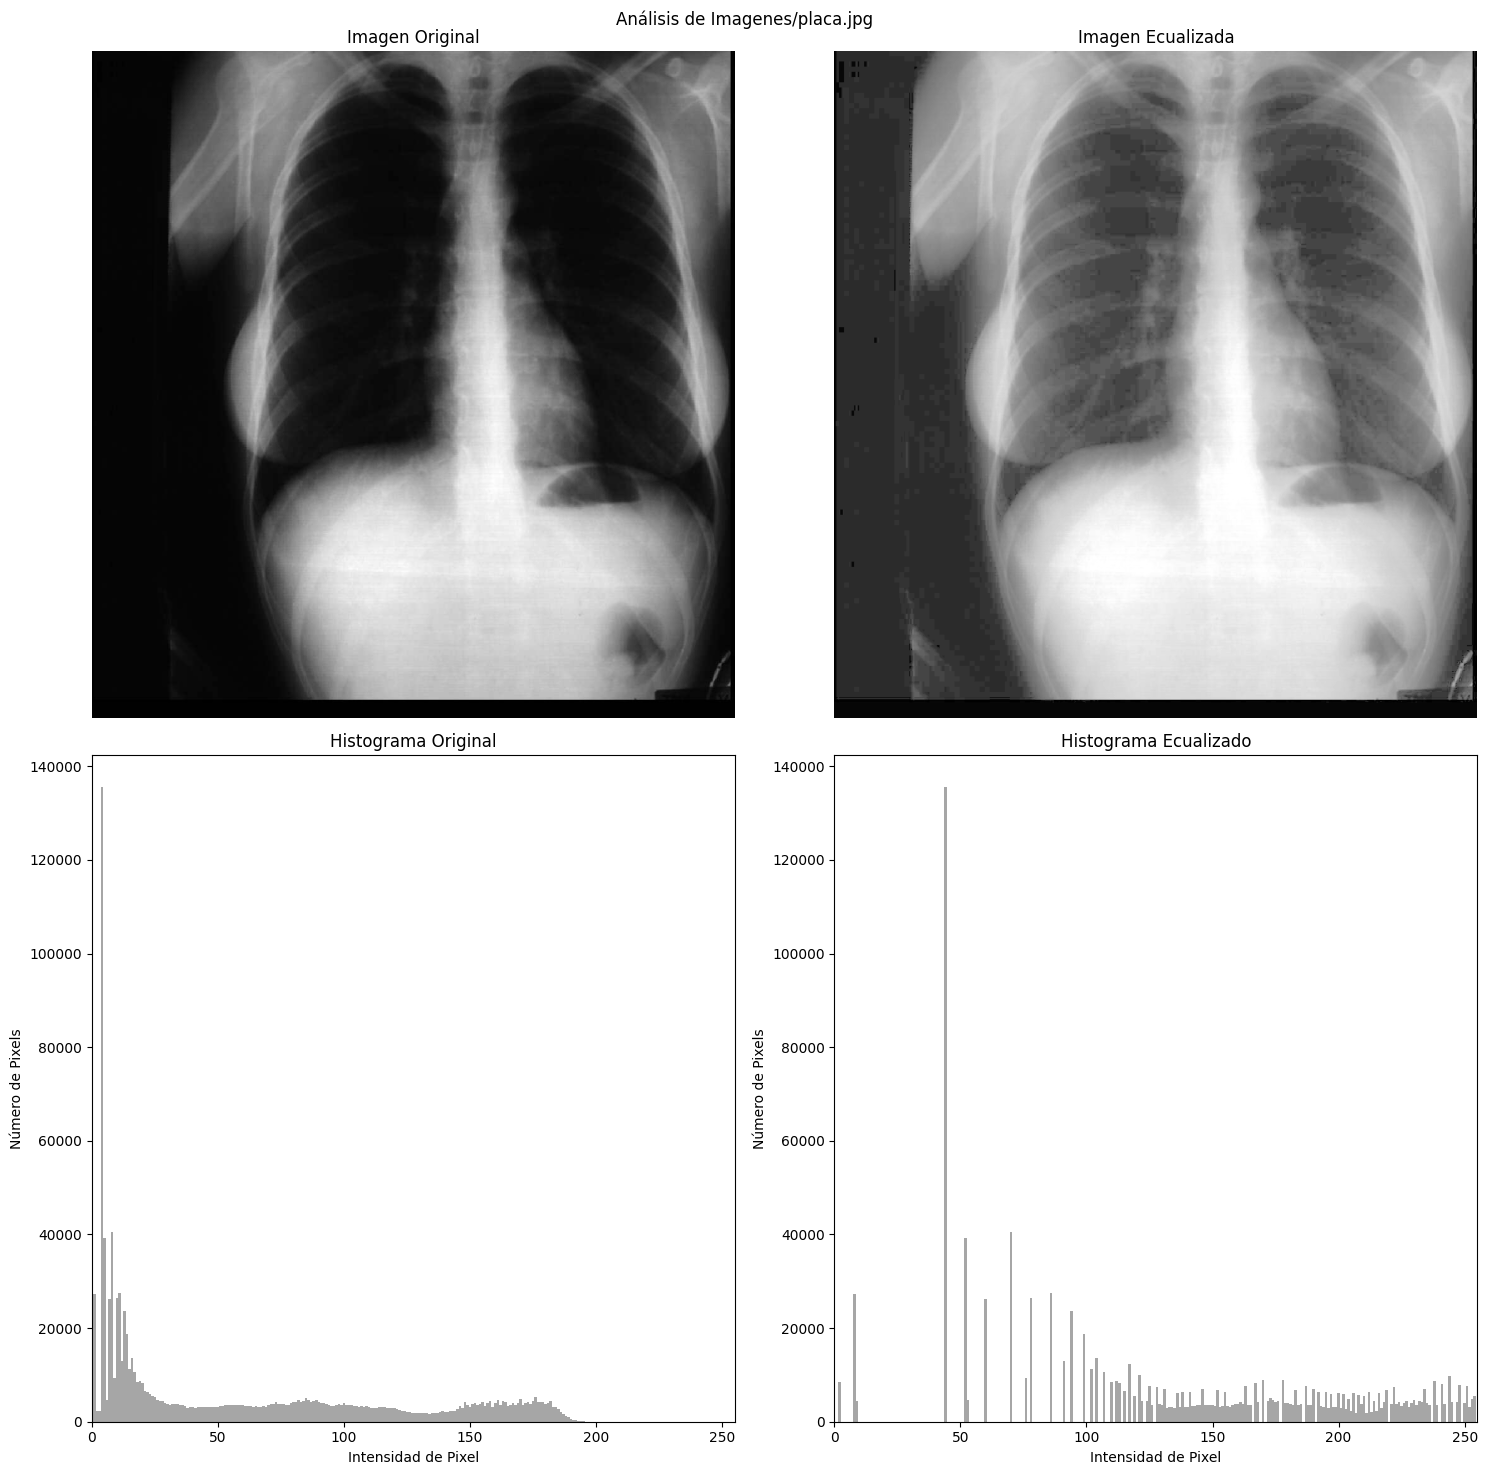

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def histeq(im, nbr_bins=256):
    imhist, bins = np.histogram(im.flatten(), nbr_bins, density=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]
    im2 = np.interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

def process_image(image_path):
    # Cargar y convertir la imagen a escala de grises
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Aplicar ecualización de histograma
    img_eq, cdf = histeq(img_array)

    # Calcular histogramas
    hist_original, bins_original = np.histogram(img_array, bins=256, range=[0, 256])
    hist_equalized, bins_equalized = np.histogram(img_eq, bins=256, range=[0, 256])

    # Visualizar resultados
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(f'Análisis de {image_path}')

    axs[0, 0].imshow(img_array, cmap='gray', aspect='auto')
    axs[0, 0].set_title('Imagen Original')
    axs[0, 0].axis('off')
    
    axs[0, 1].imshow(img_eq, cmap='gray', aspect='auto')
    axs[0, 1].set_title('Imagen Ecualizada')
    axs[0, 1].axis('off')

    axs[1, 0].bar(bins_original[:-1], hist_original, width=1, color='gray', alpha=0.7)
    axs[1, 0].set_title('Histograma Original')
    axs[1, 0].set_xlim([0, 255])
    axs[1, 0].set_xlabel('Intensidad de Pixel')
    axs[1, 0].set_ylabel('Número de Pixels')

    axs[1, 1].bar(bins_equalized[:-1], hist_equalized, width=1, color='gray', alpha=0.7)
    axs[1, 1].set_title('Histograma Ecualizado')
    axs[1, 1].set_xlim([0, 255])
    axs[1, 1].set_xlabel('Intensidad de Pixel')
    axs[1, 1].set_ylabel('Número de Pixels')

    plt.tight_layout()
    plt.show()

# Procesar imágenes
process_image('Imagenes/flores.jpg')
process_image('Imagenes/placa.jpg')

## Problema 3

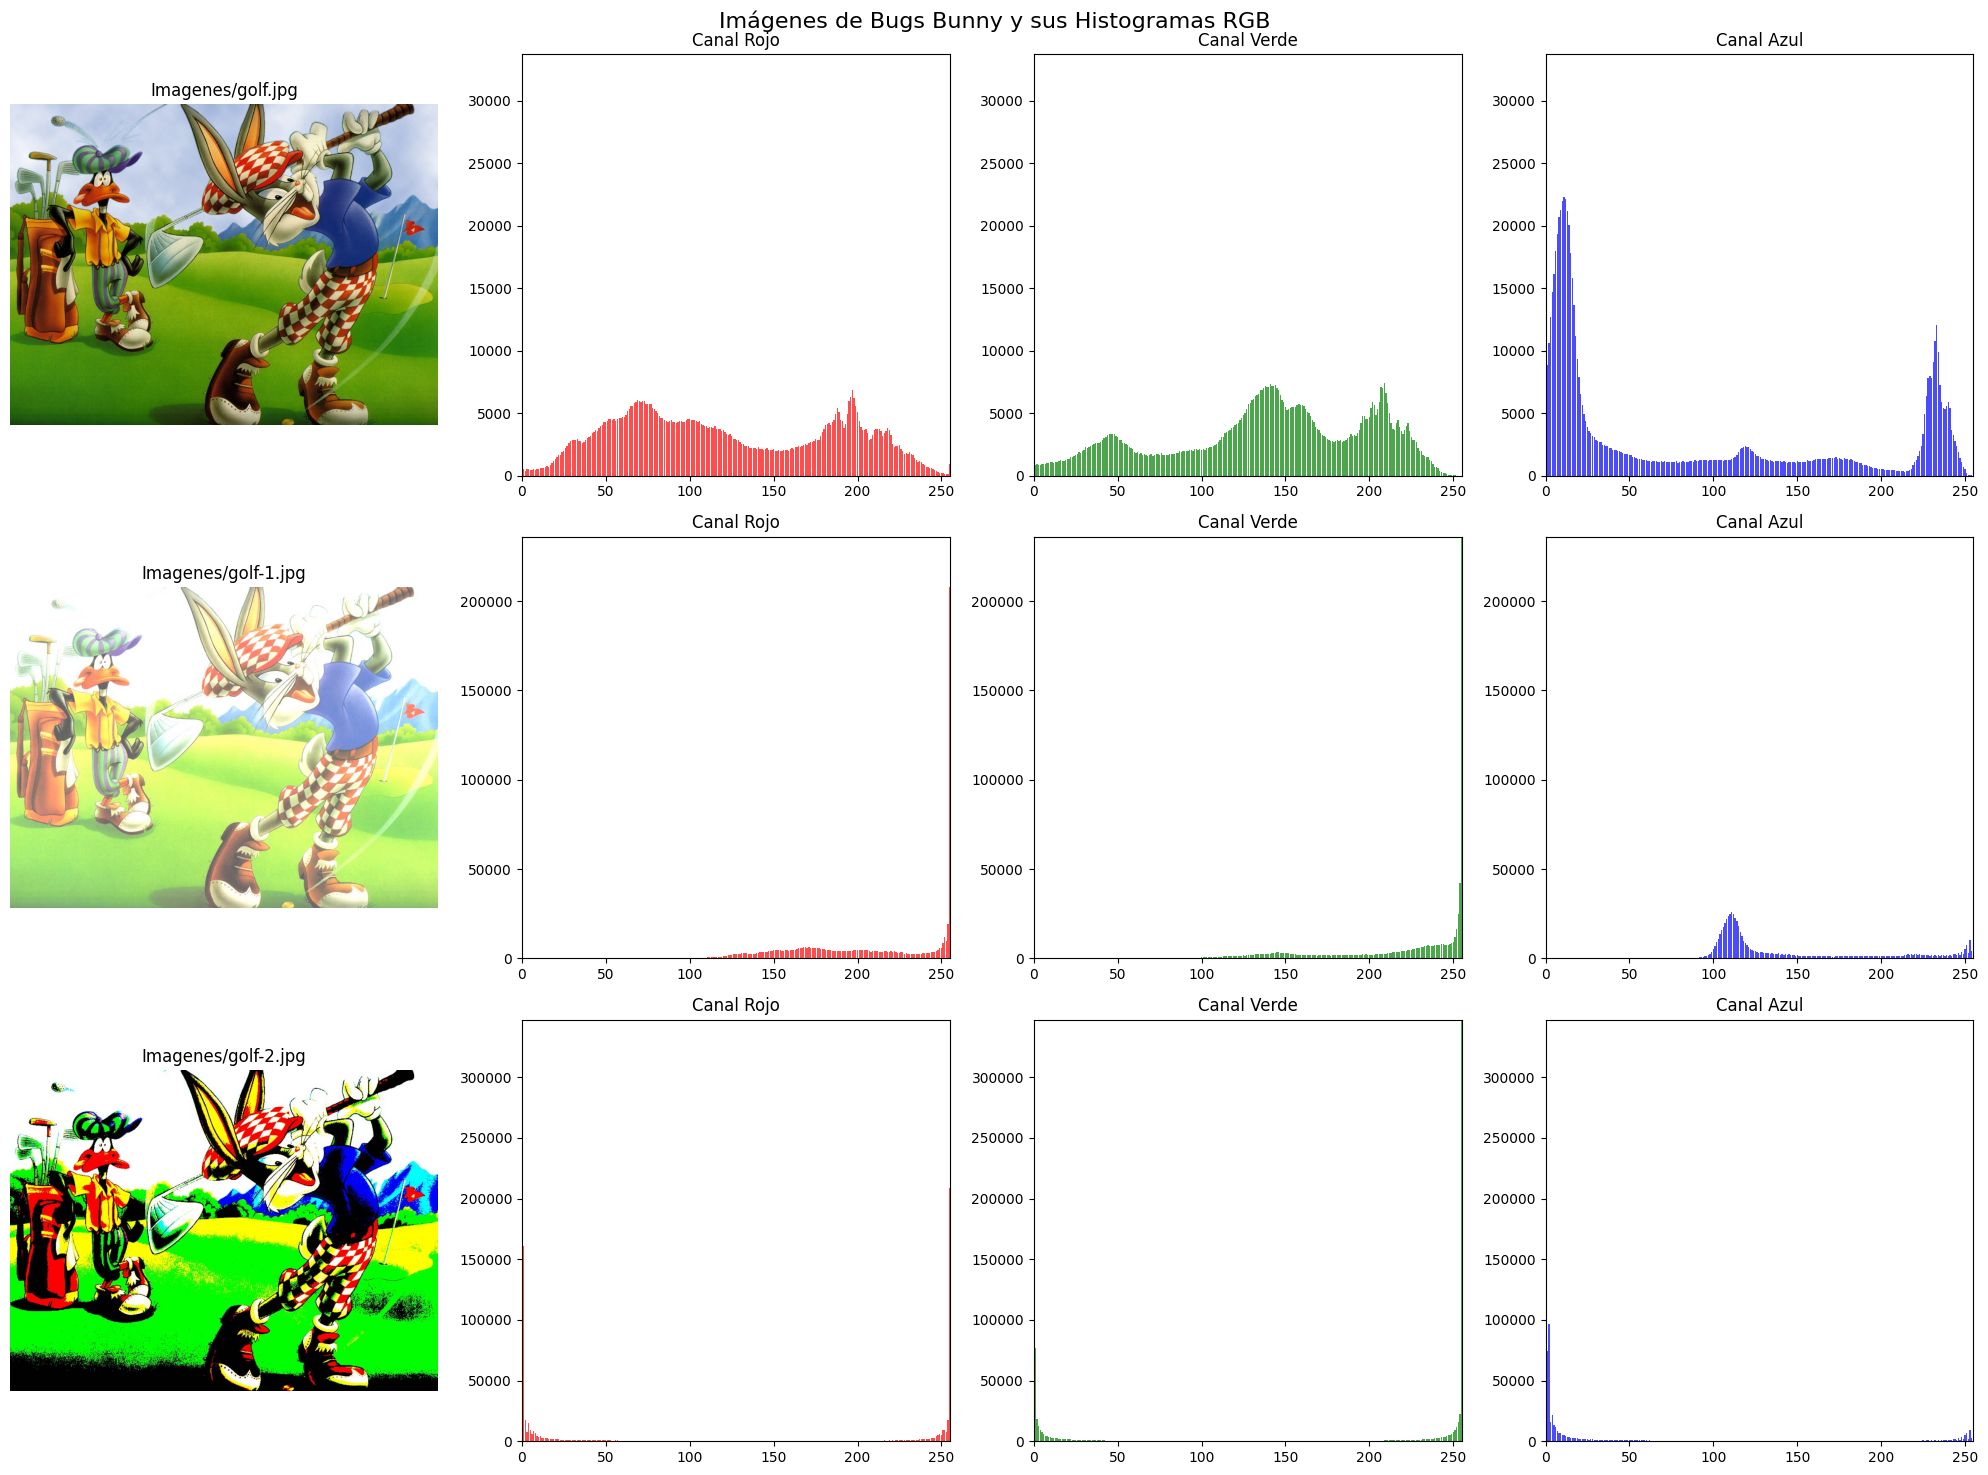

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def calculate_rgb_histogram(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]
    hist_r, _ = np.histogram(r, bins=256, range=[0, 256])
    hist_g, _ = np.histogram(g, bins=256, range=[0, 256])
    hist_b, _ = np.histogram(b, bins=256, range=[0, 256])
    return img, hist_r, hist_g, hist_b

def plot_image_and_histograms(image_paths):
    fig, axs = plt.subplots(len(image_paths), 4, figsize=(20, 5*len(image_paths)))
    fig.suptitle('Imágenes de Bugs Bunny y sus Histogramas RGB', fontsize=16)
    
    for i, path in enumerate(image_paths):
        img, hist_r, hist_g, hist_b = calculate_rgb_histogram(path)
        
        axs[i, 0].imshow(img)
        axs[i, 0].set_title(f'{path}')
        axs[i, 0].axis('off')
        
        axs[i, 1].bar(range(256), hist_r, color='red', alpha=0.7)
        axs[i, 1].set_title('Canal Rojo')
        axs[i, 1].set_xlim([0, 255])
        
        axs[i, 2].bar(range(256), hist_g, color='green', alpha=0.7)
        axs[i, 2].set_title('Canal Verde')
        axs[i, 2].set_xlim([0, 255])
        
        axs[i, 3].bar(range(256), hist_b, color='blue', alpha=0.7)
        axs[i, 3].set_title('Canal Azul')
        axs[i, 3].set_xlim([0, 255])
        
        for j in range(1, 4):
            axs[i, j].set_ylim([0, max(hist_r.max(), hist_g.max(), hist_b.max())])
    
    plt.tight_layout()
    plt.show()

# Lista de rutas de las imágenes
image_paths = ['Imagenes/golf.jpg', 'Imagenes/golf-1.jpg', 'Imagenes/golf-2.jpg']

# Calcular y mostrar las imágenes y sus histogramas
plot_image_and_histograms(image_paths)

Los histogramas de cada imagen nos da la siguiente informacion:

1. Imagen 1

    + Los histogramas de todos los canales muestran una distribución relativamente amplia, abarcando gran parte del espectro, lo que indica un buen equilibrio general.
    + Aunque todos los canales están bien representados, se observa mayor cantidad de pixeles en el canal azul, especialmente en las tonalidades medias-altas.

2. Imagen 2

    + Los histogramas de todos los canales presentan una marcada tendencia hacia los valores más claros (lado derecho), indicando una imagen de alta luminosidad.
    + En los canales rojo y verde se observa una acumulación significativa de píxeles en el extremo derecho, lo que sugiere áreas "quemadas" o sobreexpuestas en estos canales.
    + El canal azul, aunque también tiende hacia los tonos claros, mantiene una distribución más amplia a lo largo del espectro, conservando más detalle en comparación con los otros canales.


3. Imagen 3

    + Los histogramas de todos los canales muestran una distribución extrema, con picos en ambos extremos del espectro.
    + Esta distribución sugiere una imagen de alto contraste, con pocas tonalidades intermedias, lo que podría resultar en una pérdida de detalle en las sombras y las altas luces.

## Problema 4

Después de aplicar el promedio de las tres imágenes, se puede observar una mejora en cuanto a los detalles de la imagen.

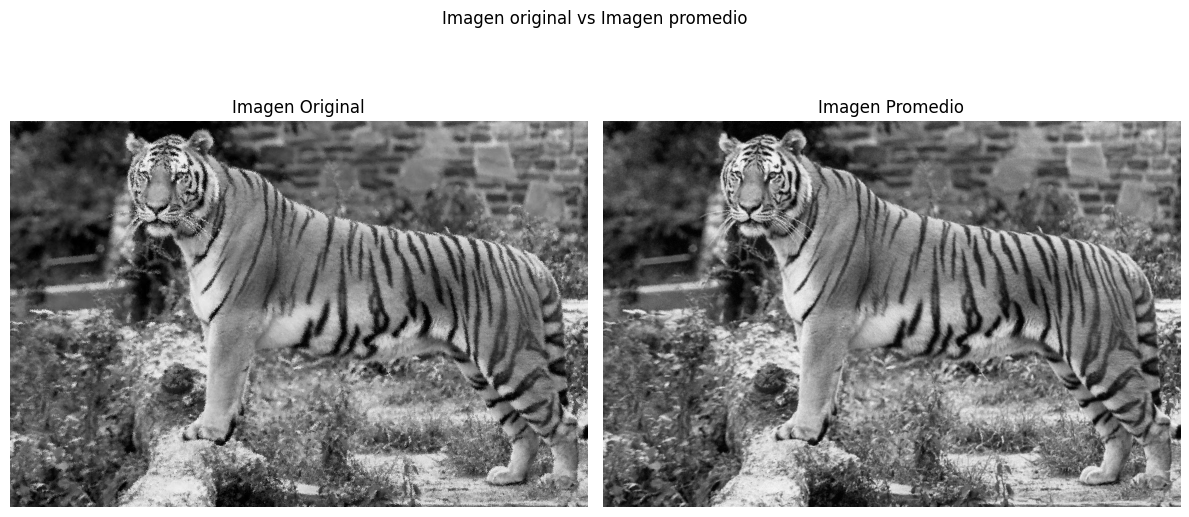

In [34]:
def compute_average(imlist):
    averageim = np.array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += np.array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
    return np.array(averageim, 'uint8')

# Uso de la función
imlist = ['Imagenes/tigre01.jpg', 'Imagenes/tigre02.jpg', 'Imagenes/tigre03.jpg']
avg_image = compute_average(imlist)

# Guardar la imagen resultante
Image.fromarray(avg_image).save('tigre_promedio.jpg')

# Mostrar una imagen original y la promedio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Imagen original vs Imagen promedio')

# Mostrar la primera imagen original
img_original = Image.open(imlist[0]).convert('L')
ax1.imshow(img_original, cmap='gray')
ax1.set_title('Imagen Original')
ax1.axis('off')

# Mostrar la imagen promedio
ax2.imshow(avg_image, cmap='gray')
ax2.set_title('Imagen Promedio')
ax2.axis('off')

plt.tight_layout()
plt.show()

## Problema 5

El parámetro sigma en el filtro gaussiano controla la intensidad y el alcance del efecto de desenfoque en la imagen. A medida que el valor de sigma aumenta, el efecto de difuminado se vuelve más pronunciado, resultando en una imagen más suavizada y con menos detalles . Un sigma bajo (por ejemplo, 1) produce un suavizado sutil que mantiene la mayoría de los detalles, mientras que valores más altos (como 5 o 10) generan un desenfoque más fuerte. 

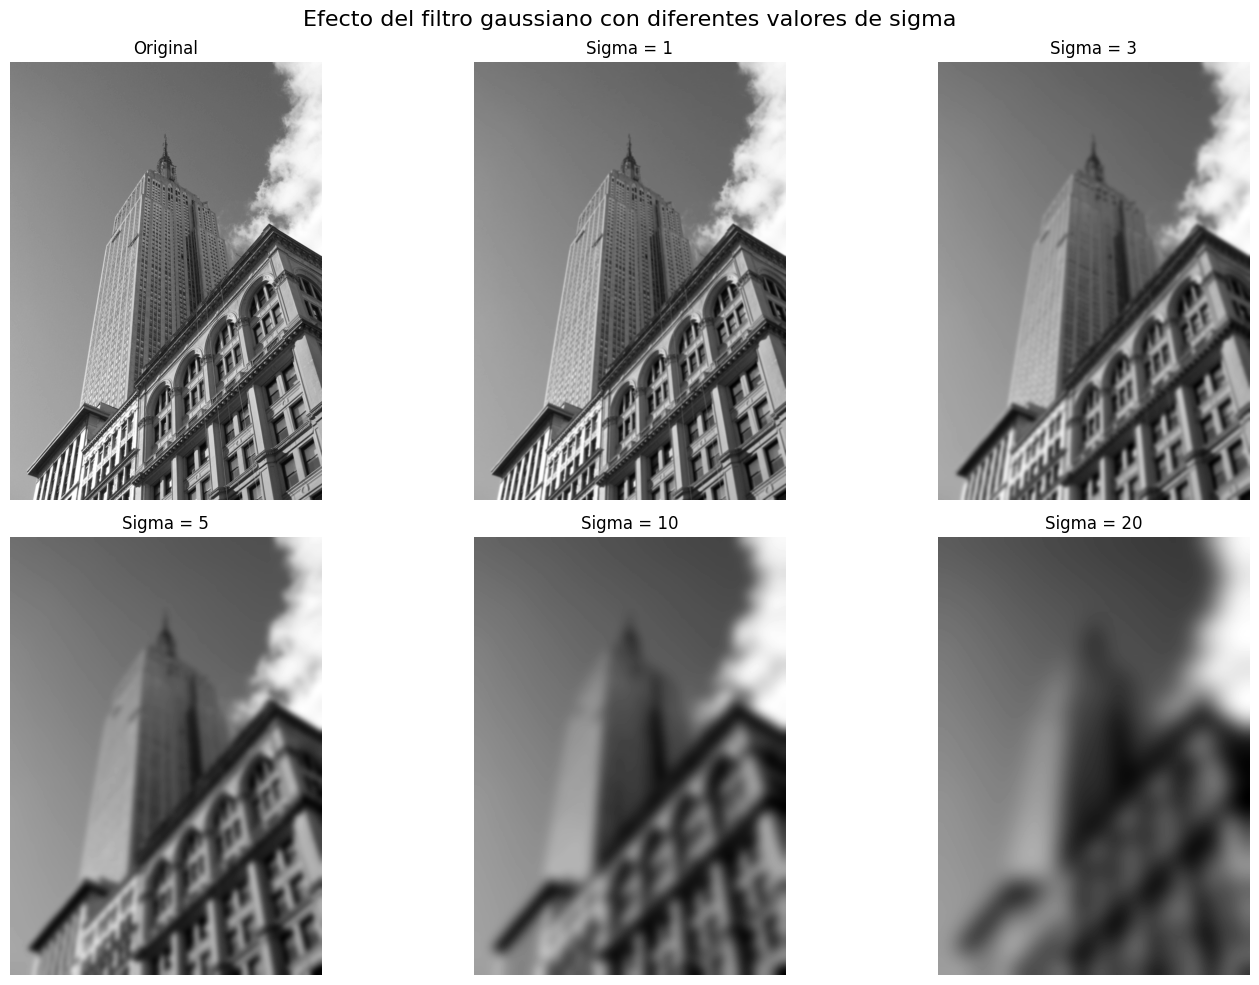

In [38]:
import numpy as np
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt

# Cargar la imagen
image = np.array(Image.open('Imagenes/empire.jpg').convert('L'))

# Aplicar filtro gaussiano con diferentes valores de sigma
sigmas = [1, 3, 5, 10, 20]
filtered_images = [ndimage.gaussian_filter(image, sigma=s) for s in sigmas]

# Visualizar los resultados
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Efecto del filtro gaussiano con diferentes valores de sigma', fontsize=16)

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

for i, (sigma, filtered) in enumerate(zip(sigmas, filtered_images), 1):
    ax = axes[i // 3, i % 3]
    ax.imshow(filtered, cmap='gray')
    ax.set_title(f'Sigma = {sigma}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Ejercicio 6

Se aplicaron tres filtros comunes: mediana, gaussiano y bilateral. La comparación de los resultados nos mjuestra que el filtro de mediana fue el más efectivo en la eliminación del ruido tipo "sal y pimienta". Este filtro logró un mejor equilibrio entre la reducción del ruido y la preservación de los bordes y detalles. Su rendimiento superior en este caso destaca su utilidad en el procesamiento de imágenes médicas.

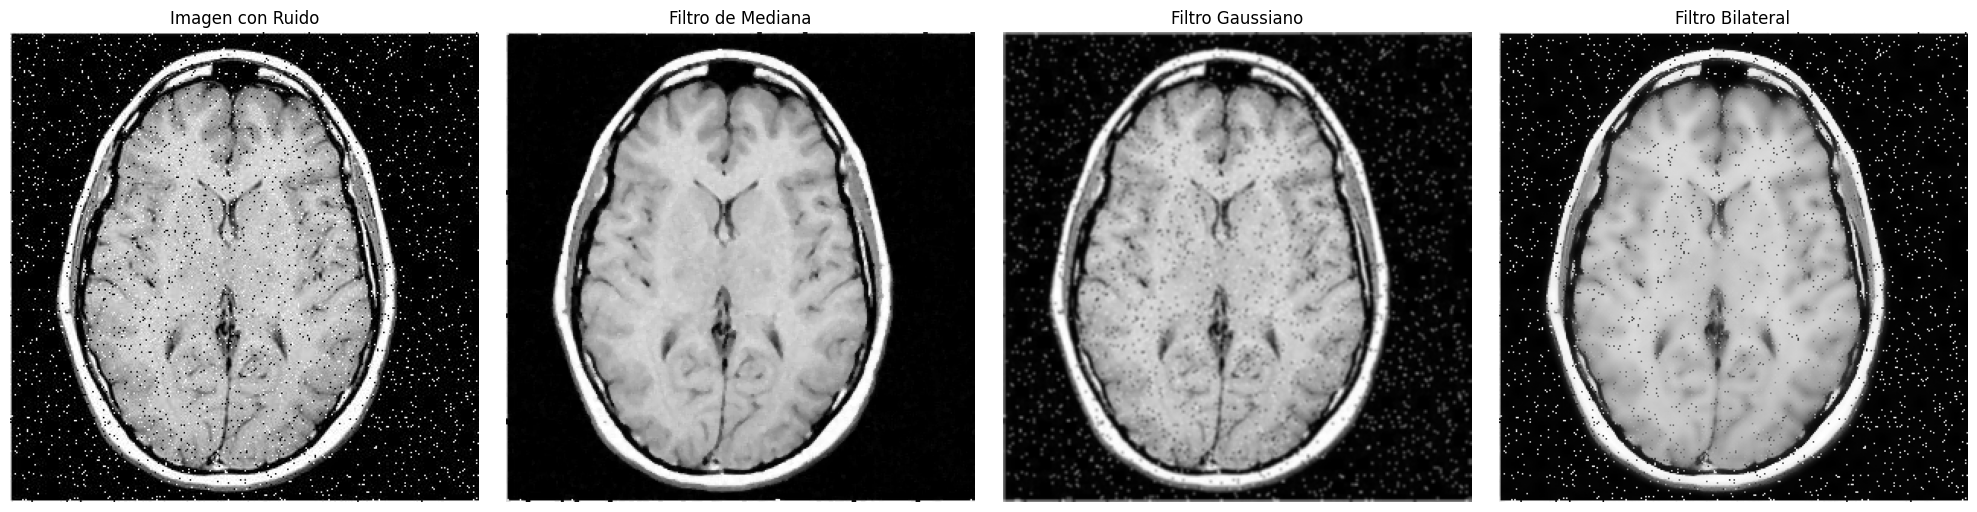

True

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_filter(image, kernel_size=3):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def apply_bilateral_filter(image, d=9, sigmaColor=75, sigmaSpace=75):
    return cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Cargar la imagen con ruido
noisy_image = cv2.imread('Imagenes/cerebro.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtros
median_filtered = apply_median_filter(noisy_image)
gaussian_filtered = apply_gaussian_filter(noisy_image)
bilateral_filtered = apply_bilateral_filter(noisy_image)

# Mostrar resultados usando matplotlib
images = [noisy_image, median_filtered, gaussian_filtered, bilateral_filtered]
titles = ['Imagen con Ruido', 'Filtro de Mediana', 'Filtro Gaussiano', 'Filtro Bilateral']
show_images(images, titles)

# Guardar resultados
cv2.imwrite('median_filtered_cerebro.jpg', median_filtered)
cv2.imwrite('gaussian_filtered_cerebro.jpg', gaussian_filtered)
cv2.imwrite('bilateral_filtered_cerebro.jpg', bilateral_filtered)


**Aplicacion del operador Laplacioano**

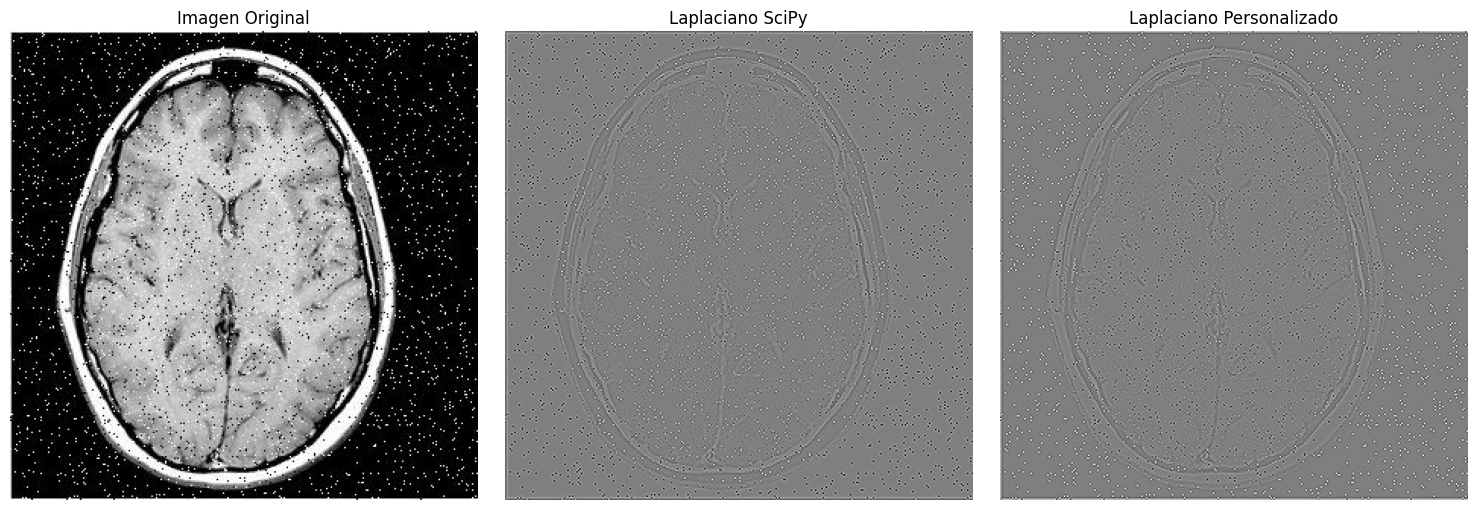

Las imágenes han sido procesadas y guardadas.


In [3]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def apply_laplacian_filter_scipy(image):
    image = image.astype(np.float64)
    filtered = ndimage.laplace(image)
    return cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

def apply_laplacian_filter_custom(image):
    kernel = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ])
    image = image.astype(np.float64)
    filtered = cv2.filter2D(image, -1, kernel)
    return cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

def show_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Cargar la imagen
image = cv2.imread('Imagenes/cerebro.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("No se pudo cargar la imagen. Asegúrate de que 'cerebro_con_ruido.jpg' esté en el directorio correcto.")
else:
    # Aplicar ambos filtros Laplacianos
    laplacian_scipy = apply_laplacian_filter_scipy(image)
    laplacian_custom = apply_laplacian_filter_custom(image)

    # Mostrar resultados usando matplotlib
    show_images([image, laplacian_scipy, laplacian_custom], 
                ['Imagen Original', 'Laplaciano SciPy', 'Laplaciano Personalizado'])

    # Guardar resultados
    cv2.imwrite('laplacian_scipy_cerebro.jpg', laplacian_scipy)
    cv2.imwrite('laplacian_custom_cerebro.jpg', laplacian_custom)

    print("Las imágenes han sido procesadas y guardadas.")

Se puede observar que tanto el operador laplaciano de SciPy como el personalizado han resaltado efectivamente los bordes y las estructuras en la imagen cerebral original. Los contornos del cráneo y las principales divisiones cerebrales son claramente visibles en ambas versiones del laplaciano, apareciendo como líneas brillantes contra un fondo más oscuro. El ruido presente en la imagen original se ha amplificado en ambas versiones del laplaciano

## Ejercicio 7

In [ ]:
from scipy import fftpack
from numpy.fft import fftshift, ifftshift, fft, ifft
from numpy import array, log, abs
from PIL import Image
import matplotlib.pyplot as plt

def dct2d(im0):
    """ Get 2D Cosine Transform of Image """
    dct = fftpack.dct(fftpack.dct(im0.T, norm='ortho').T, norm='ortho')
    return dct

def idct2d(D):
    """ Get 2D Inverse Cosine Transform of Image """
    raw = fftpack.idct(fftpack.idct(D.T, norm='ortho').T, norm='ortho')
    return raw

def fft2d(ima):
    """ Get 2D Fourier Transform of Image """
    L=fftshift(fft(fftshift(ima)))
    return L

def ifft2d(ima):
    """ Get 2D Inverse Fourier Transform of Image """
    N=ifftshift(ifft(ifftshift(ima)))
    return N

conejo1=array(Image.open('Imagenes/bugsbunny1.jpg').convert('L'))
conejo2=array(Image.open('Imagenes/bugsbunny2.jpg').convert('L'))

#FFT
conejo1_fft=fft2d(conejo1)
conejo2_fft=fft2d(conejo2)

#IFFT
conejo1_ifft=ifft2d(conejo1_fft)
conejo2_ifft=ifft2d(conejo2_fft)

#DCT
conejo1_dct=dct2d(conejo1)
conejo2_dct=dct2d(conejo2)

#IDCT
conejo1_idct=idct2d(conejo1_dct)
conejo2_idct=idct2d(conejo2_dct)

fig , ax = plt.subplots(2,5, figsize=(25,10))
ax[0,0].imshow(conejo1,cmap='gray')
ax[0,0].set_title('bugsbunny1 original',fontsize=10)
ax[1,0].imshow(conejo2,cmap='gray')
ax[1,0].set_title('bugsbunny2 original',fontsize=10)
ax[0,1].imshow(log(abs(conejo1_fft)),cmap='Paired')
ax[0,1].set_title('bugsbunny1 modulo fft',fontsize=10)
ax[1,1].imshow(log(abs(conejo2_fft)),cmap='Paired')
ax[1,1].set_title('bugsbunny2 modulo fft',fontsize=10)
ax[0,2].imshow(log(abs(conejo1_dct)),cmap='Paired')
ax[0,2].set_title('bugsbunny1 modulo dct',fontsize=10)
ax[1,2].imshow(log(abs(conejo2_dct)),cmap='Paired')
ax[1,2].set_title('bugsbunny2 modulo dct',fontsize=10)
ax[0,3].imshow(abs(conejo1_ifft),cmap='gray')
ax[0,3].set_title('bugsbunny1 recuperada a partir de fft',fontsize=10)
ax[1,3].imshow(abs(conejo2_ifft),cmap='gray')
ax[1,3].set_title('bugsbunny2 recuperada a partir de fft',fontsize=10)
ax[0,4].imshow(abs(conejo1_idct),cmap='gray')
ax[0,4].set_title('bugsbunny1 recuperada a partir de dct',fontsize=10)
ax[1,4].imshow(abs(conejo2_idct),cmap='gray')
ax[1,4].set_title('bugsbunny2 recuperada a partir de dct',fontsize=10)

plt.tight_layout()
plt.show()

Estos gráficos representan la imagen en términos de frecuencias en lugar de píxeles. Las "frecuencias" en una imagen se refieren a qué tan rápido cambian los valores de los píxeles en diferentes áreas.

**Gaficos FFT**

En el gráfico del módulo FFT, observamos que en la primera imagen hay una mayor cantidad de niveles (distintos colores) distribuidos por todo el espectro de frecuencias. Esto se traduce en una imagen con más degradados, mayor nivel de detalle y mejor definición de sombras. En contraste, la segunda imagen muestra una presencia reducida de frecuencias, lo que implica una falta de degradados y sombras, resultando en una apariencia más simple y menos detallada.

**Grafico DCT** 

En el gráfico del módulo DCT, se puede apreciar cómo en la primera imagen el paso de frecuencias bajas a altas se produce de manera mucho más gradual, lo que indica una transición suave entre las distintas variaciones de la imagen. Este comportamiento suele asociarse con una mayor calidad visual.


## Ejercicio 8

**Parte 1**

La primera parte implementa una segmentación interactiva de imágenes utilizando el algoritmo GrabCut de OpenCV. Permite al usuario dibujar un rectángulo alrededor del objeto de interés en una imagen cargada. A medida que el usuario arrastra el mouse, se dibuja un rectángulo verde en tiempo real. Cuando se suelta el botón del mouse, el código aplica el algoritmo GrabCut utilizando el rectángulo como una estimación inicial del objeto. GrabCut entonces refina esta selección, intentando separar el objeto del fondo. El resultado de la segmentación se muestra en una ventana separada llamada 'Output'. Este proceso interactivo permite al usuario seleccionar rápidamente objetos en una imagen y ver el resultado de la segmentación automática.

In [ ]:
import cv2
import numpy as np

def algo_grabcut(img, bounding_box):
    seg = np.zeros(img.shape[:2],np.uint8)
    x,y,width,height = bounding_box
    seg[y:y+height, x:x+width] = 1
    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)
    cv2.grabCut(img, seg, bounding_box, background_mdl, foreground_mdl,
                5,
                cv2.GC_INIT_WITH_RECT)
    mask_new = np.where((seg==2)|(seg==0),0,1).astype('uint8')
    img = img*mask_new[:,:,np.newaxis]
    cv2.imshow('Output', img)

def box_draw(click, x, y, flag_param, parameters):
    global x_pt, y_pt, drawing, topleft_pt, bottomright_pt, img
    if click == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_pt, y_pt = x, y
    elif click == cv2.EVENT_MOUSEMOVE:
        if drawing:
            topleft_pt, bottomright_pt = (x_pt,y_pt), (x,y)
            image[y_pt:y, x_pt:x] = 255 - img[y_pt:y, x_pt:x]
            cv2.rectangle(image, topleft_pt, bottomright_pt, (0,255,0),
                          2)
    elif click == cv2.EVENT_LBUTTONUP:
        drawing = False
        topleft_pt, bottomright_pt = (x_pt,y_pt), (x,y)
        image[y_pt:y, x_pt:x] = 255 - image[y_pt:y, x_pt:x]
        cv2.rectangle(image, topleft_pt, bottomright_pt, (0,255,0), 2)
        bounding_box = (x_pt, y_pt, x-x_pt, y-y_pt)
        algo_grabcut(img, bounding_box)

drawing = False
topleft_pt, bottomright_pt = (-1,-1), (-1,-1)

img = cv2.imread("Imagenes/im4.png")
img = cv2.resize(img ,(500,500))
image = img.copy()
cv2.namedWindow('Frame')
cv2.setMouseCallback('Frame', box_draw)

while True:
    cv2.imshow('Frame', image)
    if cv2.waitKey(22) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

**Parte 2**

convierte al espacio de color HSV, y luego utiliza la función cv2.inRange() para crear una máscara que aísla los píxeles verdes basándose en un rango de valores HSV predefinido. Después, aplica operaciones morfológicas para refinar la máscara, eliminando pequeños huecos y ruido. Luego, usa esta máscara para extraer solo las regiones verdes de la imagen original mediante una operación AND bit a bit. Finalmente, encuentra y dibuja los contornos de estas regiones verdes sobre la imagen segmentada. El resultado se muestra en una ventana titulada "Result", visualizando las áreas verdes segmentadas de la imagen original con sus contornos resaltados en rojo.

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Imagenes/im4.png')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
bound_lower = np.array([36, 25, 25])
bound_upper = np.array([70, 255,255 ])
mask_green = cv2.inRange(hsv_img, bound_lower, bound_upper)

kernel = np.ones((7,7),np.uint8)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)

seg_img = cv2.bitwise_and(img, img, mask=mask_green)

contours, hier = cv2.findContours(mask_green.copy(), cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_SIMPLE)

output = cv2.drawContours(seg_img, contours, -1, (0, 0, 255), 3)

cv2.imshow("Result", seg_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicio 9

### Umbralizacion simple
Este código demuestra diferentes técnicas de umbralización simple en OpenCV. Utiliza una imagen de gradiente y aplica cinco tipos de umbralización: BINARY (255 si supera el umbral, 0 si no), BINARY_INV (inverso de BINARY), TRUNC (mantiene valores por debajo del umbral), TOZERO (0 si está por debajo del umbral), y TOZERO_INV (inverso de TOZERO). El umbral se fija en 127 para todos los métodos. Finalmente, se visualizan los resultados en una cuadrícula de 2x3 usando matplotlib, mostrando la imagen original y los cinco resultados de umbralización.
Los resultados son los siguientes:

+ BINARY: Divide la imagen en dos regiones distintas - negro a la izquierda y blanco a la derecha del umbral (probablemente en el medio).
+ BINARY_INV: Es el inverso de BINARY, con blanco a la izquierda y negro a la derecha.
+ TRUNC: Mantiene los valores oscuros a la izquierda, pero trunca los valores más claros a la derecha a un nivel gris medio.
+ TOZERO: Conserva los valores más claros a la derecha, pero convierte todos los valores por debajo del umbral (izquierda) a negro.
+ TOZERO_INV: Es el inverso de TOZERO, manteniendo los valores más oscuros a la izquierda y convirtiendo los valores por encima del umbral (derecha) a blanco.

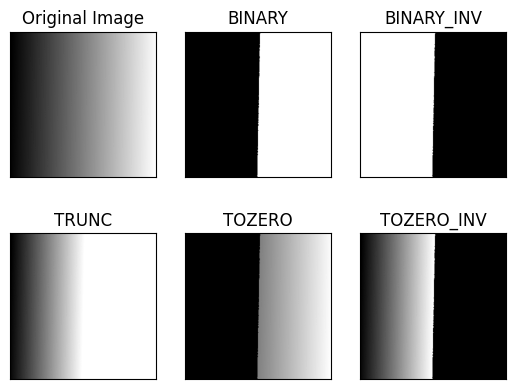

In [7]:

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Imagenes/gradiente.png', 0)
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### Umbralizacion adaptada

Este código ilustra la umbralización adaptativa en OpenCV. Utiliza una imagen de un Sudoku y aplica tres métodos de umbralización: global (umbral fijo de 127), adaptativa con media, y adaptativa con gaussiana. La umbralización adaptativa calcula el umbral para regiones pequeñas de la imagen, lo que permite manejar diferentes iluminaciones en distintas áreas. El método de media usa el promedio de la vecindad del píxel, mientras que el gaussiano usa una suma ponderada con pesos gaussianos. Se aplica un desenfoque mediano antes de la umbralización para reducir el ruido. Los resultados se muestran en una cuadrícula de 2x2 usando matplotlib.

Los resultados son los siguientes:
+ Global Thresholding (v = 127): El resultado es malo, ya que pierde mucha información debido a las variaciones de iluminación en la imagen original. Muchos números y partes de la cuadrícula se pierden, especialmente en las áreas más oscuras.
+ Adaptive Mean Thresholding: Produce un resultado mucho mejor. Preserva casi todos los números y la cuadrícula, adaptándose a las variaciones locales de iluminación. Sin embargo, también introduce algo de ruido, especialmente en los bordes.
+ Adaptive Gaussian Thresholding: Ofrece resultados similares al método de media adaptativa, pero con un poco menos de ruido en los bordes. Los números y la cuadrícula se preservan bien, y se adapta eficazmente a las diferentes condiciones de iluminación en la imagen.

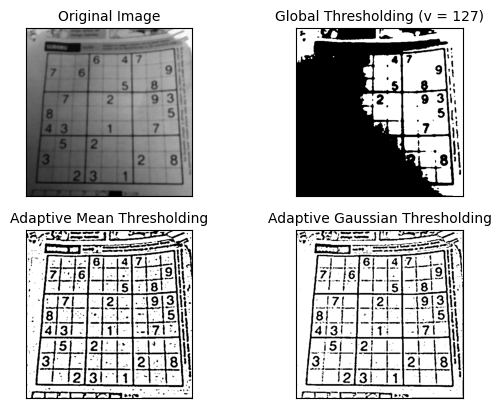

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Imagenes/sudoku.jpg', 0)
img = cv.medianBlur(img, 5)

ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=10)
    plt.xticks([]), plt.yticks([])

plt.show()

### umbralizacion OTSU
Este código demuestra la umbralización de Otsu en OpenCV. Utiliza una imagen con ruido y aplica tres métodos: umbralización global (umbral fijo de 127), umbralización de Otsu, y umbralización de Otsu después de aplicar un filtro gaussiano. El método de Otsu calcula automáticamente el umbral óptimo basándose en la varianza de los niveles de gris de la imagen. Es especialmente útil para imágenes bimodales (con dos picos en el histograma). El filtrado gaussiano se aplica para reducir el ruido antes de la umbralización de Otsu. Los resultados se muestran en una cuadrícula de 3x3, incluyendo las imágenes originales, los histogramas y las imágenes umbralizadas.
Se observo lo siguiente:

+ Otsu sin preprocesamiento: Cuando se aplica directamente a la imagen ruidosa, el método de Otsu mejora ligeramente el resultado comparado con la umbralización global, pero aún mantiene una cantidad significativa de ruido.

  
+ Otsu con filtrado Gaussiano: La aplicación de un filtro Gaussiano antes de la umbralización de Otsu produce resultados mejores. Este enfoque:
    * Reduce significativamente el ruido "sal y pimienta".
    * Mejora la bimodalidad del histograma, como se evidencia en el histograma de la imagen filtrada.
    * Resulta en una segmentación clara y bien definida de los círculos.

+ Eficacia en imágenes bimodales: El método de Otsu es particularmente eficaz en imágenes con distribuciones bimodales de intensidad, como se observa después del filtrado Gaussiano.

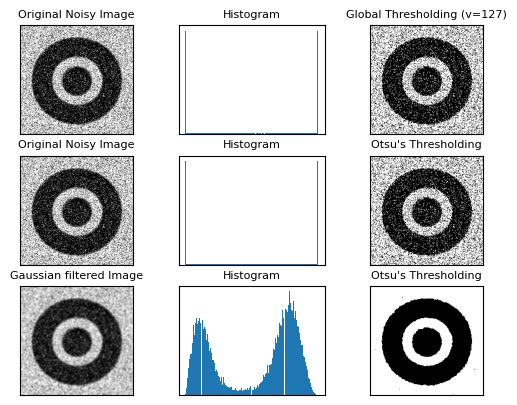

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Imagenes/noise.png', 0)

# Global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3], fontsize=8), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1], fontsize=8), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2], fontsize=8), plt.xticks([]), plt.yticks([])

plt.show()

## Ejercicio 10
El operador Sobel calcula el gradiente de la intensidad de la imagen en cada punto, dando la dirección del mayor cambio posible (el incremento) de oscuro a claro y la tasa de cambio en esa dirección. El resultado muestra qué tan abruptamente o suavemente cambia la imagen en cada punto, y por lo tanto qué tan probable es que represente un borde.
Este código específicamente calcula los gradientes tanto en la dirección horizontal (Sobelx) como en la vertical (Sobely), lo que permite detectar bordes en ambas direcciones.

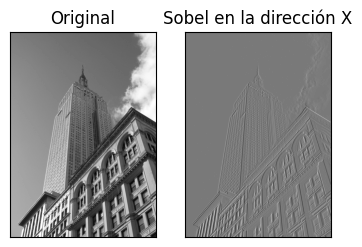

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

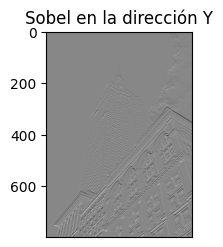

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('Imagenes/empire.jpg', cv.IMREAD_GRAYSCALE) #importación de imágen
Sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=1) #aplicación de Sobel en
Sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=1) #aplicación de Sobel en
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img,cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(Sobelx, cmap='gray')
plt.title('Sobel en la dirección X')
plt.xticks([])
plt.yticks([])
plt.show()
plt.subplot(1, 3, 3)
plt.imshow(Sobely, cmap='gray')
plt.title('Sobel en la dirección Y')
plt.xticks([])
plt.yticks()

## Problema 11


In [ ]:
import cv2
import numpy as np

# Cargar la imagen en blanco y negro
imagen = cv2.imread('Imagenes/bugsbunny1.jpg') # 

# Definir el kernel (elemento estructurante)
kernel = np.ones((7, 7), np.uint8) # Tamaño del kernel (puedes ajustarlo)

# Aplicar erosión
erosion = cv2.erode(imagen, kernel, iterations=1)

# Aplicar dilatación
dilatacion = cv2.dilate(imagen, kernel, iterations=1)

# Mostrar las imágenes original, erosionada y dilatada
cv2.imshow('Imagen Original', imagen)
cv2.imshow('Erosión', erosion)
cv2.imshow('Dilatación', dilatacion)

# Esperar a que se presione una tecla y luego cerrar las ventanas
cv2.waitKey(0)
cv2.destroyAllWindows()

## Problema 12

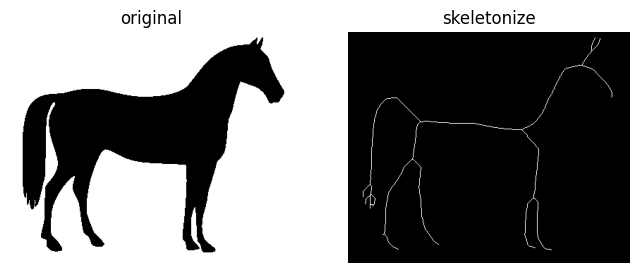

In [9]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt

def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.set_axis_off()
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.set_axis_off()

horse = data.horse()

sk = skeletonize(horse == 0)
plot_comparison(horse, sk, 'skeletonize')

## Problema 13

Utiliza una imagen de monedas y selecciona una subimagen de una moneda como plantilla. Luego, busca esta plantilla en toda la imagen original utilizando la función match_template() de scikit-image. El resultado es un mapa de correlación donde los valores más altos indican las áreas de mayor similitud con la plantilla. El código encuentra la ubicación de la mejor coincidencia y visualiza los resultados en tres partes: la plantilla original, la imagen completa con la mejor coincidencia marcada, y el mapa de correlación resultante. Este método es útil para detectar objetos específicos en imágenes más grandes, ilustrando cómo se pueden localizar patrones similares en una imagen basándose en una muestra conocida.

75
170


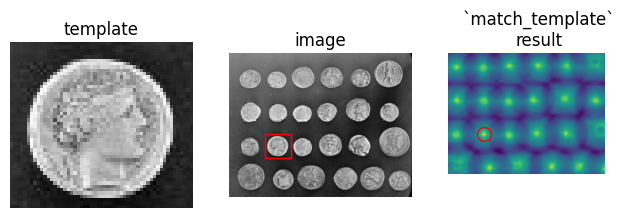

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template

image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
print(x)
print(y)
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()